# ISLR- Python: Ch3 -- Applied Question 11 & 12

## Applied Question 11

- [Generate Data](#Generate-Data)
- [Scatter Plot](#Scatter-Plot)
- [Regress y onto x](#Regress-y-onto-x)
- [Regress x onto y](#Regress-x-onto-y)
- [Interpret Regression Coeffecients](#Interpret-Regression-Coeffecients)

In [1]:
# perform standard imports
import numpy as np
import statsmodels.api as sm

from matplotlib import pyplot as plt

%matplotlib inline
plt.style.use('ggplot') # emulate pretty r-style plots

### Generate Data

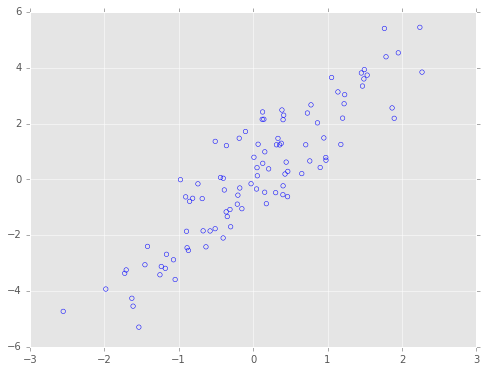

In [2]:
np.random.seed(0)
x = np.random.randn(100)
y = 2*x + np.random.randn(100)

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x,y, facecolors='none', edgecolors='b');

### Regress y onto x

In [3]:
model = sm.OLS(y,x)
estimate = model.fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     426.4
Date:                Tue, 28 Jun 2016   Prob (F-statistic):           1.16e-37
Time:                        09:39:31   Log-Likelihood:                -144.94
No. Observations:                 100   AIC:                             291.9
Df Residuals:                      99   BIC:                             294.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.1191      0.103     20.650      0.0

#### The slope (coeffecient) for the x predictor without an intercept is 2.12. This slope has a high t-statistic and low p-value (i.e. significant), which is expected since we know the form ${Y=2X+\epsilon}$

### Regress x onto y

In [4]:
model2 = sm.OLS(x,y)
estimate2 = model2.fit()
print(estimate2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     426.4
Date:                Tue, 28 Jun 2016   Prob (F-statistic):           1.16e-37
Time:                        09:39:31   Log-Likelihood:                -59.401
No. Observations:                 100   AIC:                             120.8
Df Residuals:                      99   BIC:                             123.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.3830      0.019     20.650      0.0

### Interpret Regression Coeffecients

#### When we regress y onto x,  ${\beta}$ is the slope term of the x predictor. We know the true ${\beta=2}$, thus we get a coeffecient close to 2. Given that this captures all the variance except the irreducible data var ${var(\epsilon)}$ the standard error is low and the coeffecient is highly significant. 

#### When we regress x onto y, we are inverting the equation to read ${X=Y\left(\frac{1-\epsilon}{\beta}\right)}$. Thus we get a coeffecient that is close to the inverse slope ${1/\beta}$. Notice that the standard error is lower because the random variable ${\epsilon}$ is being divided by the coeffecient ${\beta}$. 

#### Importantly, the t-statistic and p-value remain unchanged. We have shown this numerically and will now show it algebraically.

#### Given ${t = \frac{\beta}{SE\left(\beta\right)}}$   and   ${SE\left(\beta\right)}=\sqrt{\frac{\sum{\left(y_i-\beta x_i\right)^2}}{\left(n-1\right)\sum{x_i^2}}}$   and   $\beta=\frac{\sum{x_i y_i}}{\sum{x_i^2}}$ by 3.38

#### Show the t-statistic can be written as ${\frac{\sqrt{n-1}\sum_{i=1}^n{x_iy_i}}{\sqrt{\sum{x_i^2}*\sum_{i'=1}^{n}{y_{i'}^2}-\sum_{i=1}^{n}{\left(x_i*y_i\right)^2}}}}$
#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


#### Substituting ${\beta}$ into $t$ we get: ${t=\frac{\sqrt{n-1} \sum{x_i y_i}}{\sqrt{\sum{x_i^2}}\sqrt{\sum{y_i^2-2 \sum{ y_i x_i \frac{\sum{x_i y_i}}{\sum{x_i^2}}}+\sum{\left(\frac{\sum{x_i y_i}}{\sum{x_i^2}}\right)^2 x_i^2}}}}}$

#### The denominator can be simplified by distributing $\sqrt{\sum{x_i^2}}$ and by pulling the mini-sums out of the larger sums (they are constants) to get: ${t=\frac{\sqrt{n-1} \sum{x_i y_i}}{{\sum{x_i^2}\sum{y_i^2}-\sum{\left(x_i y_i\right)^2}}}}$ Q.E.D

#### *Notice that we can switch x, y with each other and get the exact same t-statistic. This is why the t-statistic and the p-value for the regression of y onto x and x onto y are the same.*


### Applied Question 12

#### (a) The coeffecient of regression for y~x and x~y will be the same if the denominator of $\beta=\frac{\sum{x_i y_i}}{\sum{x_i^2}}$ is equal (i.e.) $\sum{x_i^2} = \sum{y_i^2}$.

In [8]:
#(b) Example where the coeffecient is different because the sum of squares is different
np.random.seed(0)
x = np.random.randn(100)
y = x + np.random.randn(100)

print('Question B:')

model1_yx = sm.OLS(y,x)
estimate1_yx = model1_yx.fit()
print("The coeffecient for y~x is:", estimate1_yx.params)

model1_xy = sm.OLS(x,y)
estimate1_xy = model1_xy.fit()
print("The coeffecient for x~y is:", estimate1_xy.params)

#(c) Example where the coeffecient is the same because the sum of squares are the same

# Define a random vector x and set y_i to be a random sample from x without replacement. Note y does not necessarily 
# =x but the sum of the squares will be the same
x = np.random.randn(100)
y = np.random.choice(x,100,replace=False)

print('\n')
print('Question C:')

model2_yx = sm.OLS(y,x)
estimate2_yx = model2_yx.fit()
print("The coeffecient for y~x is:", estimate2_yx.params)

model2_xy = sm.OLS(x,y)
estimate2_xy = model2_xy.fit()
print("The coeffecient for x~y is:", estimate2_xy.params)


Question B:
The coeffecient for y~x is: [ 1.11910764]
The coeffecient for x~y is: [ 0.48763449]


Question C:
The coeffecient for y~x is: [-0.15473722]
The coeffecient for x~y is: [-0.15473722]
